Erin Orbits  
DATA 512 Project Due: Oct 19, 2017

In [ ]:
"""
The code and import statements in this cell in order to run the code in subsequent cells.
The applicable import statements are listed at the top of each cell to aid cut & paste.
"""

# This code displays all results created within a jupyter notebook cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This code displays Matplotlib objects inline.
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

# All libraries used in this notebook
import csv
import json
import requests
import time
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import pandas as pd
print("Pandas Version", pd.__version__)

# Set the maximum number of rows & columns to be displayed
pd.set_option('display.max_column', 50)
pd.set_option('display.max_row', 100)

import seaborn

## Step 1: Data acquisition

We will collect monthly data on web traffic to English Wikipedia from two Wikipedia APIs and save the data in JSON files. We will make five API calls and then save the JSON results into five separate JSON data files. We will make the API requests in python code below, but these are the complete URLs for all five API requests:

  #### Pagecount Get Requests
  https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/en.wikipedia.org/desktop-site/monthly/2008010100/2017100100  

  https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/en.wikipedia.org/desktop-site/monthly/2008010100/2017100100
  
  #### Pageview Get Requests
  http://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia/mobile-app/user/monthly/2015080100/2017100100

  https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia/mobile-web/user/monthly/2015080100/2017100100

  http://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia/desktop/user/monthly/2015080100/2017100100

In [1]:
import csv
import json
import requests
import time

json_file_names = ["pagecounts_desktop-site_200801-201607.json",
                   "pagecounts_mobile-site_200801-201607.json",
                   "pageviews_desktop_201508-201709.json",
                   "pageviews_mobile_201508-201709.json",
                   "pageviews_mobile-web_201508-201709.json"]


params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop", # or "mobile-app" or "mobile-web"
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015080100",
                    # use 1st day of following month to collect a full month of data
                    "end" : '2018080100'
                    }

params_pagecounts = {"project" : "en.wikipedia.org",
                     "access" : "desktop-site", # or "mobile-site"
                     "granularity" : "monthly",
                     "start" : "2008010100",
                     # use 1st day of following month to collect a full month of data
                     "end" : "2018080100"
                    }

def api_call(api_type="pageview",
             parameters=params_pageviews, file_name="api_file.json"):
    """
    :param api_type: sets the Wikipedia API for the GET request,
                     the default value is "pageview"
    :param parameters: sets the values for the GET request,
                       the default value is params_pageviews
    :param file_name: sets the JSON file name for saving data,
                      the default value is the file name api_file.json 
    :returns: JSON file
    This function calls the API and gets a JSON response in a
    format like this:
        {"items":[{"project":"en.wikipedia","access-site":"desktop-site",
                   "granularity":"monthly","timestamp":"2008010100",
                   "count":4930902570},...]}
    """
    start = time.time()
    
    base_url = "https://wikimedia.org/api/rest_v1/metrics/"
    
    if api_type == "pageview":
        # Pageview endpoint to be modified during API calls.
        endpoint_pageview = base_url + "pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}"
        api_call = requests.get(endpoint_pageview.format(**parameters))
    elif api_type == "pagecount":
        # Pagecount endpoint to be modified during API calls.
        endpoint_pagecount = base_url + "legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}"
        api_call = requests.get(endpoint_pagecount.format(**parameters))
    else:
        print("Unable to submit API request. Please try again.")  
    
    # Submits GET request and saves JSON response
    response = api_call.json()   
    
    # Saves JSON file
    with open(file_name, "w") as file:
        json.dump(response, file)
    
    end = time.time()
    # Notifies user that JSON file was saved.
    print("Data written to file: {} in {} sec.".format(str(file_name), round(end-start, 2)))
    
    # Returns the JSON response
    return(response)


# Calls api_call() function to get data from Pageview API
pageview_access = ["desktop", "mobile-app", "mobile-web"]
for item in pageview_access:
    # set the method used to access Wikipedia pages 
    params_pageviews["access"] = item
    api_call(api_type="pageview", parameters=params_pageviews,
             file_name="data/pageviews_"+str(item)+"_201508-201709.json")

# Calls api_call() function to get data from Pagecount API
pagecount_access = ["desktop-site", "mobile-site"]
for item in pagecount_access:
    params_pagecounts["access"] = item
    api_call(api_type="pagecount", parameters=params_pagecounts,
             file_name="data/pagecounts_"+str(item)+"_200801-201607.json")


Data written to file: data/pageviews_desktop_201508-201709.json in 0.32 sec.
Data written to file: data/pageviews_mobile-app_201508-201709.json in 0.3 sec.
Data written to file: data/pageviews_mobile-web_201508-201709.json in 0.36 sec.
Data written to file: data/pagecounts_desktop-site_200801-201607.json in 0.34 sec.
Data written to file: data/pagecounts_mobile-site_200801-201607.json in 0.3 sec.


## Alternative API call

In [2]:
import csv
import json
import pandas as pd
import requests
import time

params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop", # or "mobile-app" or "mobile-web"
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015080100",
                    # use 1st day of following month to collect a full month of data
                    "end" : '2018080100'
                    }

params_pagecounts = {"project" : "en.wikipedia.org",
                     "access" : "desktop-site", # or "mobile-site"
                     "granularity" : "monthly",
                     "start" : "2008010100",
                     # use 1st day of following month to collect a full month of data
                     "end" : "2018080100"
                    }

def api_call(api_type="pageview",
             parameters=params_pageviews, file_name="api_file.json"):
    """
    :param api_type: sets the Wikipedia API for the GET request,
                     the default value is "pageview"
    :param parameters: sets the values for the GET request,
                       the default value is params_pageviews
    :param file_name: sets the JSON file name for saving data,
                      the default value is the file name api_file.json 
    :returns: JSON file
    This function calls the API and gets a JSON response in a
    format like this:
        {"items":[{"project":"en.wikipedia","access-site":"desktop-site",
                   "granularity":"monthly","timestamp":"2008010100",
                   "count":4930902570},...]}
    """
    start = time.time()
    
    base_url = "https://wikimedia.org/api/rest_v1/metrics/"
    
    if api_type == "pageview":
        # Pageview endpoint to be modified during API calls.
        endpoint = base_url + "pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}"
    elif api_type == "pagecount":
        # Pagecount endpoint to be modified during API calls.
        endpoint = base_url + "legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}"
    else:
        print("Unable to submit API request. Please try again.")  
    
    # Submits GET request and saves JSON response
    response = requests.get(endpoint.format(**parameters)).json()
    
    test_df = pd.DataFrame.from_records(response["items"])

    # Create columns for year and month in DataFrame.
    test_df["year"] = test_df["timestamp"].str[0:4]
    test_df["month"] = test_df["timestamp"].str[4:6]
    
    # Standardize "access" and "access-site" columns to "access."
    if "access-site" in test_df.columns:
        test_df.rename(columns={"access-site" : "access", "count" : "views"}, inplace=True)
    elif "agent" in test_df.columns:
        test_df.drop(columns=["agent"], axis=0, inplace=True)
    
    end = time.time()
    
    # Notifies user that JSON file was saved.
    print("{} data downloaded in {} sec.".format(str(file_name), round(end-start, 2)))
    
    # Returns the JSON response
    return(test_df)


api_access_dict = {"pageview": ("desktop", "mobile-app", "mobile-web"),
                   "pagecount": ("desktop-site", "mobile-site")}

df = pd.DataFrame(columns=["access", "granularity", "project", "month", "year", "timestamp", "views"])
# Calls the function api_call() to get JSON data from Pageview API and save files
for api_type in api_access_dict.keys():
    for item in api_access_dict[api_type]:
        if api_type is "pageview":
            # set parameter for the method used to access Wikipedia pages 
            params_pageviews["access"] = item
            new_df = api_call(api_type=api_type, parameters=params_pageviews,
                              file_name="data/pageviews_"+str(item)+"_201508-201807.json")
        else:
            params_pagecounts["access"] = item
            new_df = api_call(api_type=api_type, parameters=params_pagecounts,
                              file_name="data/pagecounts_"+str(item)+"_200801-201607.json")
        df = pd.concat([df, new_df], sort=True)

# Saves the combined raw data
df.to_csv("data/all_raw_data.csv", sep=",", index=False, encoding="utf-8")
print("\nSummary of df")
df.info()
df.head(10)

data/pageviews_desktop_201508-201807.json data downloaded in 0.31 sec.
data/pageviews_mobile-app_201508-201807.json data downloaded in 0.32 sec.
data/pageviews_mobile-web_201508-201807.json data downloaded in 0.32 sec.
data/pagecounts_desktop-site_200801-201607.json data downloaded in 0.32 sec.
data/pagecounts_mobile-site_200801-201607.json data downloaded in 0.3 sec.

Summary of df
<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 22
Data columns (total 7 columns):
access         235 non-null object
granularity    235 non-null object
month          235 non-null object
project        235 non-null object
timestamp      235 non-null object
views          235 non-null object
year           235 non-null object
dtypes: object(7)
memory usage: 14.7+ KB


,access,granularity,month,project,timestamp,views,year
0,desktop,monthly,08,en.wikipedia,2015080100,4332482183,2015
1,desktop,monthly,09,en.wikipedia,2015090100,4485491704,2015
2,desktop,monthly,10,en.wikipedia,2015100100,4477532755,2015
3,desktop,monthly,11,en.wikipedia,2015110100,4287720220,2015
4,desktop,monthly,12,en.wikipedia,2015120100,4100012037,2015
5,desktop,monthly,01,en.wikipedia,2016010100,4436179457,2016
6,desktop,monthly,02,en.wikipedia,2016020100,4250997185,2016
7,desktop,monthly,03,en.wikipedia,2016030100,4286590426,2016
8,desktop,monthly,04,en.wikipedia,2016040100,4149383857,2016
9,desktop,monthly,05,en.wikipedia,2016050100,4191778094,2016


In [3]:
# Summarize the total page views by type and year
df[["access", "year", "views"]].groupby(["year", "access"], axis=0).sum()

views
year access                    
2008 desktop-site   63393633216
2009 desktop-site   68581532868
2010 desktop-site   80401918648
2011 desktop-site   81985666709
2012 desktop-site   93478404281
2013 desktop-site  105647832072
2014 desktop-site   82120155427
     mobile-site     9397986374
2015 desktop        21683238899
     desktop-site   67512739904
     mobile-app       494207491
     mobile-site    39049110005
     mobile-web     15859704389
2016 desktop        51335101775
     desktop-site   38480520431
     mobile-app      1135495729
     mobile-site    24565855179
     mobile-web     40595027280
2017 desktop        46665101438
     mobile-app      1641560794
     mobile-web     43102688999
2018 desktop        25886068146
     mobile-app       870607433
     mobile-web     27424697049

## Step 2: Data processing

In this step, we perform a series of processing steps on the saved JSON data files generated by the API requests. This processing is being done  to prepare the data for analysis and combine the relevant features into a single CSV-formatted data file.  

The processing will include:  
 - extracting the year (YYYY) and month (MM) from the timestamp data;  
 - setting null values to 0;  
 - creating columns with total page views from each API; and  
 - adding together the monthly views from the mobile-app and mobile-web sources to create a total mobile traffic count for each month.  
  
The final, consolidated data file is saved as:
`en-wikipedia_traffic_200801-201807.csv`

In [2]:
import csv
import json
import pandas as pd

OUTPUT_FILE = "data/en-wikipedia_traffic_200801-201807.csv"

JSON_FILES = ["data/pagecounts_desktop-site_200801-201607.json",
              "data/pagecounts_mobile-site_200801-201607.json",
              "data/pageviews_desktop_201508-201807.json",
              "data/pageviews_mobile-app_201508-201807.json",
              "data/pageviews_mobile-web_201508-201807.json"]

# This dictionary is more for reference since intermediate
# DataFrames are named in the format: DICT_DF[count]
DICT_DF = {0 : "pagecounts_desktop_df",
           1 : "pagecounts_mobile_df",
           2 : "pageviews_desktop_df",
           3 : "pageviews_mobileapp_df",
           4 : "pageviews_mobileweb_df"}

count = 0 

# Loop through JSON files for processing
for jfile in JSON_FILES:
    
    with open(jfile, encoding="utf-8") as data_file:
        
        dict_data = json.load(data_file) # dictionary object
        extracted_items = dict_data["items"] # a list object
        
        # Create a DataFrame with "keys" as column names.
        DICT_DF[count] = pd.DataFrame.from_dict(extracted_items)
        
    # Create columns for year and month in DataFrame.
    DICT_DF[count]["year"] = DICT_DF[count]["timestamp"].str[0:4]
    DICT_DF[count]["month"] = DICT_DF[count]["timestamp"].str[4:6]
        
    # Standardize "access" and "access-site" columns to "access."
    if "access-site" in DICT_DF[count].columns:
        DICT_DF[count].rename(columns={"access-site" : "access"}, inplace=True)
        
    # Get the source of page view traffic.
    # .at and .iat are meant to access a scalar (a single element in df), while
    # .loc and .iloc access several elements at the same time, potentially to perform vectorized operations
    traffic_source = DICT_DF[count]["access"].at[1]
        
    # Rename count or views column with specific name.
    if traffic_source == "desktop-site":
        DICT_DF[count].rename(index=str,
                              columns={"count" : "pagecount_desktop_views",
                                       "views" : "pagecount_desktop_views"},
                              inplace=True)
    elif traffic_source == "mobile-site":
        DICT_DF[count].rename(index=str,
                              columns={"count" : "pagecount_mobile_views",
                                       "views" : "pagecount_mobile_views"},
                              inplace=True)
    elif traffic_source == "desktop":
        DICT_DF[count].rename(index=str,
                              columns={"count" : "pageview_desktop_views",
                                       "views" : "pageview_desktop_views"},
                              inplace=True)
    elif traffic_source == "mobile-app":        
        DICT_DF[count].rename(index=str,
                              columns={"count" : "pageview_mobile_views",
                                       "views" : "pageview_mobile_views"},
                              inplace=True)
    elif traffic_source == "mobile-web":
        DICT_DF[count].rename(index=str,
                              columns={"count" : "pageview_mobile_views",
                                       "views" : "pageview_mobile_views"},
                              inplace=True)

    # If DataFrame includes an "agent" column, then drop these columns.
    if "agent" in DICT_DF[count].columns:
        # The axis is 0 for rows or 1 for columns.
        # To delete DataFrame columns w/o reassigning, use inplace=True. 
        DICT_DF[count].drop(["access", "granularity", "agent", "project", "timestamp"],
                             axis=1, inplace=True)
            
    # If DataFrame doesn't include "agent" column, then drop these columns.
    else:
        DICT_DF[count].drop(["access", "granularity", "project", "timestamp"],
                             axis=1, inplace=True)
        
    # Increment the counter for initial DataFrame names.    
    count = count + 1

    
# Merge the pagecount DataFrames, change NA values to 0, and
# add "pagecount_all_views" column.
df_pagecount = DICT_DF[0].merge(DICT_DF[1], how='outer',
                                on=["year", "month"])
df_pagecount = df_pagecount.fillna(0)
df_pagecount["pagecount_all_views"] = df_pagecount["pagecount_desktop_views"] + df_pagecount["pagecount_mobile_views"]

# Merge the pageview DataFrames, change NA values to 0, and
# add "pageview_all_views" column.
df_mobile = DICT_DF[3].merge(DICT_DF[4], how='outer',
                             on=["year", "month"])
df_mobile["pageview_mobile_views"] = df_mobile["pageview_mobile_views_x"] + df_mobile["pageview_mobile_views_y"]  
df_mobile.drop(["pageview_mobile_views_x", "pageview_mobile_views_y"],
               axis=1, inplace=True)
df_pageview = df_mobile.merge(DICT_DF[2], how='outer',
                              on=["year", "month"])
df_pageview = df_pageview.fillna(0)
df_pageview["pageview_all_views"] = df_pageview["pageview_mobile_views"] + df_pageview["pageview_desktop_views"]

# Merge the pagecount and pageview DataFrames, and keep NA values as 0.
df_final = df_pagecount.merge(df_pageview, how='outer',
                              on=["year", "month"])
df_final = df_final.fillna(0).astype(int)

# Reorder the columns in the final DataFrame.
df_final = df_final[["year", "month", "pagecount_all_views",
                     "pagecount_desktop_views", "pagecount_mobile_views",
                     "pageview_all_views", "pageview_desktop_views",
                     "pageview_mobile_views"]]

# Remove original index and reset index as a multi-column index.
df_yr_mo_index = df_final.set_index(["year", "month"])

# Write final version of DataFrame w/o separate index to CSV file.
df_yr_mo_index.to_csv(OUTPUT_FILE, sep=",", encoding='utf-8')

# Display last 20 rows of combined DataFrame.
df_final.tail(20)

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
107,2016,12,0,0,0,7986152433,4209608578,3776543855
108,2017,1,0,0,0,8753941940,4521980398,4231961542
109,2017,2,0,0,0,7738463562,4026702163,3711761399
110,2017,3,0,0,0,8223465891,4319971902,3903493989
111,2017,4,0,0,0,7591080111,3951456992,3639623119
112,2017,5,0,0,0,7874558299,4187870579,3686687720
113,2017,6,0,0,0,7123934190,3604550997,3519383193
114,2017,7,0,0,0,7290503797,3565444544,3725059253
115,2017,8,0,0,0,7196978615,3575572313,3621406302
116,2017,9,0,0,0,7079052261,3547447892,3531604369


## Step 3: Analysis

Now, we will produce a sample visualization of the Engligh Wikipedia traffic data as a time series graph tracking three traffic metrics: mobile traffic, desktop traffic, and all traffic (mobile + desktop).  

__Visualization Tools__  
To generate this visualization in the cell below, the following python libraries were used: [matplotlib](https://matplotlib.org), [seaborn](http://seaborn.pydata.org), and [pandas](http://pandas.pydata.org).  

__Data__  
While we could have read data from the CSV file, we used data from the combined DataFrame for the y values since `df_final` was already created in an earlier cell. For the x-axis values, we could have pulled the year and month from the CSV file or `df_final` but it was easiest to generate a date range with pandas, see the `dates` variable.

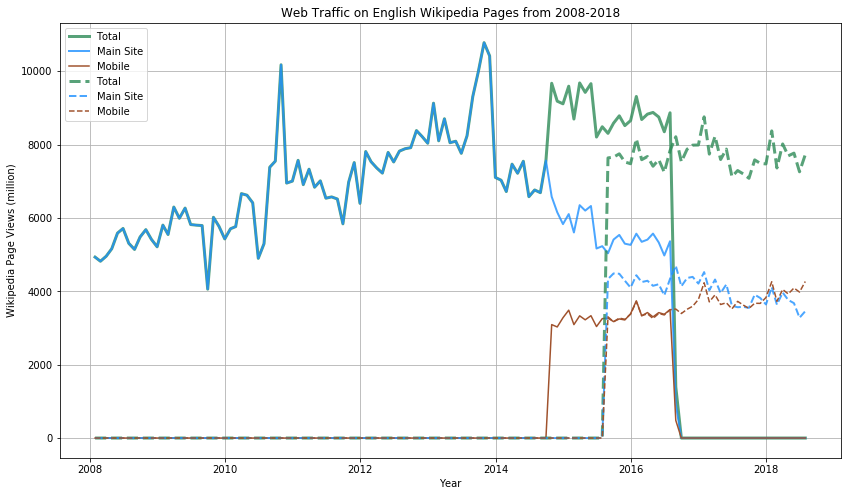

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn


# Generate values for x-axis.
dates = pd.date_range('2008-01', '2018-08', freq='M')

# Values to be plotted.
x = dates
# Values are divided by 1,000,000 to make y-axis readable.
y1 = df_final["pagecount_all_views"]/1000000
y2 = df_final["pagecount_desktop_views"]/1000000
y3 = df_final["pagecount_mobile_views"]/1000000
y4 = df_final["pageview_all_views"]/1000000
y5 = df_final["pageview_desktop_views"]/1000000
y6 = df_final["pageview_mobile_views"]/1000000

# Create a new figure with appropriate dimensions.
fig = plt.figure(figsize=(14, 8))

# Show grid
plt.grid(True)

# Plot each data series from DataFrame.
plt.plot(x, y1, label = "Total", color = "seagreen",
         alpha = 0.8, linewidth = 3)
plt.plot(x, y2, label = "Main Site", color = "dodgerblue",
         alpha = 0.8, linewidth = 2)
plt.plot(x, y3, label = "Mobile", color = "sienna")
plt.plot(x, y4, linestyle = "--", label = "Total",
         color = "seagreen", alpha = 0.8, linewidth = 3)
plt.plot(x, y5, "--", label = "Main Site",
         color = "dodgerblue", alpha = 0.8, linewidth = 2)
plt.plot(x, y6, "--", label = "Mobile", color = "sienna")

plt.legend(loc=2)
# plt.xticks(rotation=-10)
plt.xlabel("Year")
plt.ylabel("Wikipedia Page Views (million)")
plt.title("Web Traffic on English Wikipedia Pages from 2008-2018")

# Display plot
plt.show()

# Save plot to file
fig.savefig("WikipediaDataPlot_2008-2018.png")